In [1]:
import pandas as pd

from rdkit import Chem
from rdkit.Chem import AllChem
from collections import defaultdict
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolsToGridImage, MolToImage
from rdkit.Chem import Descriptors, rdMolDescriptors

from rdkit.Chem import rdmolops
from rdkit.Chem.MolStandardize import rdMolStandardize

from copy import deepcopy
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 500,500

from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(False)

import numpy as np

from DescriptorCreator.GraphChargeShell import GraphChargeShell
gcs_generator = GraphChargeShell()

SQM folder is: 
/Users/nicolairee/KU_data/peder_xai/smi2gcs/calculations


In [3]:
smi = 'Brc1c(NC2CC2)nc(C2CC2)nc1N1CCCCCC1'
idx = 7

cm5_list = gcs_generator.calc_CM5_charges(smi, name='testmol', optimize=False, save_output=True)
descriptor_vector, mapper_vector = gcs_generator.create_descriptor_vector([idx], n_shells=5, max_neighbors=4, use_cip_sort=True)
mapper_vector = mapper_vector[0]
descriptor_vector = np.array(descriptor_vector[0])

In [4]:
molobj = gcs_generator.rdkit_mol

priority_list = [x for x in mapper_vector if x != 'NaN']
priority_mapper = [priority_list.index(x) if x in priority_list else -1 for x in range(molobj.GetNumAtoms())]

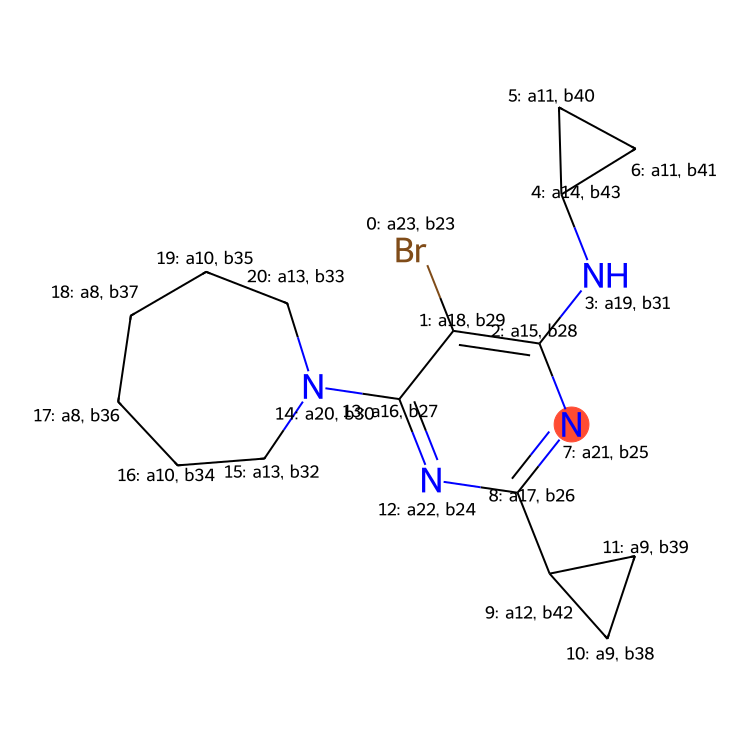

In [5]:
# inputSmiles = Chem.MolToSmiles(gcs_generator.rdkit_mol)

ps = Chem.SmilesParserParams()
ps.allowCXSMILES = True
ps.parseName = False
ps.sanitize = True
ps.removeHs = False
ps.explicit3dChirality = False

# molobj = Chem.MolFromSmiles(inputSmiles, ps)

# molobj = Chem.MolFromSmiles(Chem.MolToSmiles(molobj))


# Chem.rdCIPLabeler.AssignCIPLabels(molobj,force=True,cleanIt=True)
# Chem.AssignStereochemistry(molobj,force=True,cleanIt=True)

Chem.AssignStereochemistry(molobj, cleanIt=True, force=True, flagPossibleStereoCenters=True)
cip_labels = [int(atom.GetProp('_CIPRank')) for atom in molobj.GetAtoms()]

for coef, cm5, ca, cip, atom in zip(priority_mapper, cm5_list, list(Chem.rdmolfiles.CanonicalRankAtoms(molobj)), cip_labels, molobj.GetAtoms()):
    # label = f"{coef:.0f}, {cm5:.3f}, {ca}, {cip}, {atom.GetIdx()}"
    # label = f"{ca}, c:{cip}"
    label = f"{atom.GetIdx()}: a{cip}, b{ca}"
    # label = f"{coef:.0f}, {cm5:.3f}, {ca}, {atom.GetIdx()}"
    # label = f"{coef:.0f}, {ca}, {atom.GetIdx()}"
    atom.SetProp("atomNote", label)

AllChem.Compute2DCoords(molobj)

MolToImage(
    Chem.RemoveHs(molobj),
    size=(750, 750),
    highlightAtoms=[idx],
    highlightColor=(1,0.3,0.2)
)

In [6]:
m  = Chem.MolFromSmiles('[H]N(c1nc(C2([H])C([H])([H])C2([H])[H])nc(N2C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C2([H])[H])c1[H])C1([H])C([H])([H])C1([H])[H]')
print(list(Chem.rdmolfiles.CanonicalRankAtoms(m, breakTies=True)))
print(list(Chem.rdmolfiles.CanonicalRankAtomsInFragment(m, atomsToUse=[9,12], breakTies=False)))

[13, 14, 11, 16, 18, 7, 8, 12, 15, 19, 9, 3, 1, 2, 4, 10, 0, 17, 5, 6]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, 19, -1, -1, 18, -1, -1, -1, -1, -1, -1, -1]


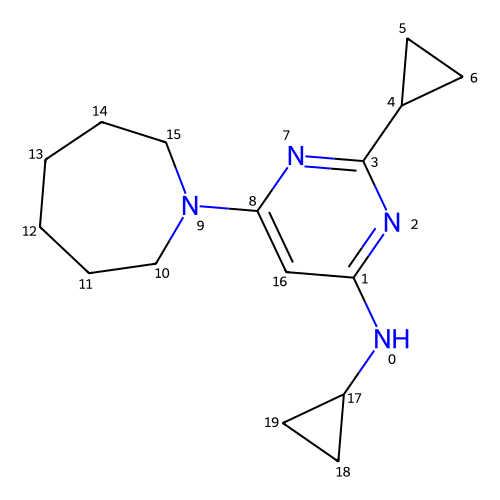

In [7]:
m

In [8]:
molobj = gcs_generator.rdkit_mol
print(list(Chem.rdmolfiles.CanonicalRankAtoms(molobj, breakTies=True)))
print(list(Chem.rdmolfiles.CanonicalRankAtomsInFragment(molobj, atomsToUse=[2,8], breakTies=False)))

[23, 29, 28, 31, 43, 40, 41, 25, 26, 42, 38, 39, 24, 27, 30, 32, 34, 36, 37, 35, 33, 0, 22, 17, 18, 19, 20, 21, 13, 14, 15, 16, 1, 2, 5, 6, 9, 10, 11, 12, 7, 8, 3, 4]
[-1, -1, 38, -1, -1, -1, -1, -1, 38, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


In [9]:
m = gcs_generator.rdkit_mol #Chem.MolFromSmiles('c1ncccc1c1cccnc1')
Chem.AssignStereochemistry(m,cleanIt=True,force=True,flagPossibleStereoCenters=True)
print([int(atom.GetProp('_CIPRank')) for atom in m.GetAtoms() if atom.HasProp('_CIPRank')])

[23, 18, 15, 19, 14, 11, 11, 21, 17, 12, 9, 9, 22, 16, 20, 13, 10, 8, 8, 10, 13, 7, 6, 3, 3, 3, 3, 4, 1, 1, 1, 1, 5, 5, 2, 2, 0, 0, 0, 0, 2, 2, 5, 5]


In [10]:
for atom in molobj.GetAtoms():
    print(atom.GetPropsAsDict())
    print(atom.GetProp('__computedProps'))
    break

{'__computedProps': <rdkit.rdBase._vectNSt3__112basic_stringIcNS_11char_traitsIcEENS_9allocatorIcEEEE object at 0x152ebab40>, 'origNoImplicit': False, '_CIPRank': 23, 'atomNote': '0: a23, b23'}
[origNoImplicit,_CIPRank,]


In [11]:
# inputSmiles = "C[C@H](Cl)CC[C@H](Cl)C"
inputSmiles = Chem.MolToSmiles(gcs_generator.rdkit_mol)

ps = Chem.SmilesParserParams()
ps.allowCXSMILES = True
ps.parseName = False
ps.sanitize = True
ps.removeHs = False
ps.explicit3dChirality = False

mol = Chem.MolFromSmiles(inputSmiles, ps)

Chem.rdCIPLabeler.AssignCIPLabels(mol)

cip_labels = []
for atom in mol.GetAtoms():
    cip_labels.append(int(atom.GetProp("_CIPRank")))

print(cip_labels)

[7, 19, 15, 21, 17, 12, 4, 9, 1, 1, 9, 1, 1, 22, 16, 20, 13, 5, 5, 10, 2, 2, 8, 0, 0, 8, 0, 0, 10, 2, 2, 13, 5, 5, 18, 23, 14, 6, 11, 3, 3, 11, 3, 3]


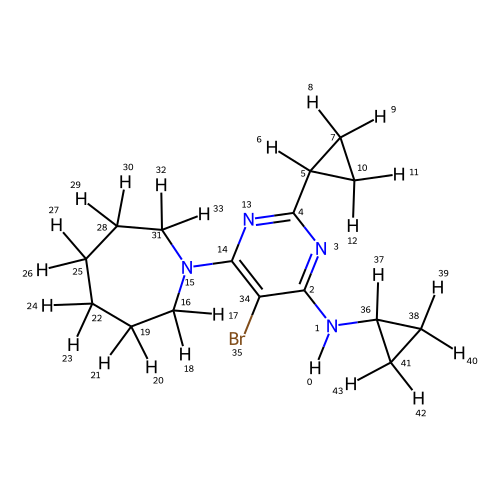

In [12]:
mol

In [13]:
def get_connected_atoms(subgraphs, ac_matrix, contained_atoms):
    """ Get idxs of connected atoms (subgraphs) """
    subgraphs = [np.nonzero(ac_matrix[i])[1] for i in subgraphs] # extract the next subgraphs
    subgraphs = [list(set(atoms) - set(contained_atoms)) for atoms in subgraphs] #exclude already included atoms
    return subgraphs


def cip_sort_atoms_step2(subgraph, ac_matrix, contained_atoms):
    """ Second part of the CIP sorting routine.

    2) If (1) is not unique, for each atom with same priority (A*):
        a) Go to bound and yet not included atoms and sum up atomic numbers. Set priority of A* according to summed atomic numbers.
        b) If (2a) did not give unambiguous result expand shell of each atom A* by one bond.
        c) repeat (2b) until unique order is found.
    """
    
    # NOTE ac_priorities could also be defined as np.sum(ac_matrix, axis=1) outside the while loop, 
    # but then subgraph atoms would be counted twice which makes it harder to debug, although the sorting would not change.
    not_included_atoms = [0 if i in contained_atoms else 1 for i in range(ac_matrix.shape[0])]
    ac_priorities = np.dot(ac_matrix, not_included_atoms)
    
    # Set priority of A* according to summed atomic numbers for bound and yet not included atoms
    # NOTE priorities += np.sum(ac_priorities[subgraphs], axis=1) would be an option,
    # if subgraphs had the same shape e.g. no subgraphs = [[13], [2], [10, 11, 27]]
    subgraph_priorities = [int(np.sum(ac_priorities[s])) for s in subgraph] # converts the sum into integer as atomic numbers are integers

    contained_atoms = list(set(contained_atoms) | set(np.concatenate(subgraph))) # update the list of included atoms
    
    subgraph = get_connected_atoms(subgraph, ac_matrix, contained_atoms) # get bound and yet not included atoms

    return subgraph, subgraph_priorities, contained_atoms

In [14]:
# smi = 'C(NC)=NN'
# cm5 = gcs_generator.calc_CM5_charges(smi=smi)
# print(cm5)
# Chem.AddHs(Chem.MolFromSmiles(smi))

In [24]:
%time
### SORTING TESTS ###

# Example for CIP sorting a molecule, where step2 should end ealier for some atoms
# [6 6 6] --> [18 18 18] --> [32 32 34] (stop for atom3, due to higher priority else --> [67 67 34]).
# Moreover, atom property comparison is indeed for atom1 and atom2.
molobj = Chem.AddHs(Chem.MolFromSmiles('C(c1cc(Br)c1)(c1cc(Br)c1)c1cnc1'))
feature_list = [-0.06121, 0.0121, -0.11463, 0.06838, -0.04068, -0.12524, 0.00966, -0.11705, 0.06807, -0.04101, -0.128, -0.03875, 0.10757, -0.50379, 0.22998, 0.10719, 0.09273, 0.0936, 0.09266, 0.0926, 0.09951, 0.09633]
contained_atoms = [0]
block = [1,6,11]

# # Example for CIP sorting a molecule, where step2 should end ealier for some atoms
# # [6 6 6 1] --> [18 18 18 1] --> [32 32 34 1] (stop for atom3, due to higher priority else --> [41 67 34 1]).
# # Moreover, atom property comparison is indeed for atom1 and atom2.
# molobj = Chem.AddHs(Chem.MolFromSmiles('C(c1cc(F)c1)(c1cc(Br)c1)c1cnc1'))
# feature_list = [-0.06003, 0.03027, -0.14135, 0.28993, -0.24696, -0.17102, 0.00915, -0.11414, 0.06884, -0.03825, -0.12766, -0.03945, 0.11013, -0.50171, 0.23061, 0.10937, 0.10239, 0.10343, 0.09394, 0.09401, 0.10104, 0.09747]
# contained_atoms = [0]
# block = [1,6,11,15]

# # Example for CIP sorting a molecule
# molobj = Chem.AddHs(Chem.MolFromSmiles('C(SC)(SN)(OC)ON'))
# feature_list = [0.53776, -0.15146, -0.14013, 0.00463, -0.80451, -0.53698, 0.05721, -0.44213, -0.61479, 0.0856, 0.09257, 0.0879, 0.38649, 0.38702, 0.08815, 0.08918, 0.07929, 0.39737, 0.39682]
# contained_atoms = [0]
# block = [1,3,5,7]

# Example for CIP sorting a molecule
molobj = Chem.AddHs(Chem.MolFromSmiles('C(NC)N=N'))
feature_list = [0.20409, -0.75281, -0.03061, -0.2436, -0.40684, 0.09264, 0.10898, 0.39752, 0.08205, 0.08124, 0.08172, 0.38562]
contained_atoms = [0]
block = [1,3,5,6]

# Example for CIP sorting a molecule
molobj = Chem.AddHs(Chem.MolFromSmiles('C(NC)=NN'))
feature_list = [0.35155, -0.71974, -0.01852, -0.4195, -0.69884, 0.08131, 0.40033, 0.08188, 0.08909, 0.10093, 0.37694, 0.37457]
contained_atoms = [0]
block = [1,3,5]

# # Example for CIP sorting a molecule
# molobj = Chem.AddHs(Chem.MolFromSmiles('C(S[H])(SN)(OF)ON'))
# feature_list = [0.56293, -0.23013, 0.03261, -0.81934, -0.29504, -0.04369, -0.40699, -0.60605, 0.21618, 0.39175, 0.39628, 0.4053, 0.39619]
# contained_atoms = [0]
# block = [1,2,4,6]

# # Example for CIP sorting a molecule
# molobj = Chem.AddHs(Chem.MolFromSmiles('c1ccccc1N'))
# feature_list = [-0.12512, -0.07987, -0.1069, -0.07987, -0.12512, 0.19794, -0.888, 0.08544, 0.08124, 0.08046, 0.08124, 0.08544, 0.39656, 0.39656]
# contained_atoms = [1]
# block = [0,2,8]

# # Example for CIP sorting a molecule
# molobj = Chem.AddHs(Chem.MolFromSmiles('C(N)(F)C'))
# feature_list = [0.35303, -0.93861, -0.32947, -0.24712, 0.09229, 0.39057, 0.3926, 0.09447, 0.09393, 0.09832]
# contained_atoms = [0]
# block = [1,2,3,4]

# # Example for CIP sorting a molecule
# molobj = Chem.AddHs(Chem.MolFromSmiles('C(CN)(CF)(CC)C'))
# feature_list = [-0.10044, 0.03242, -0.94693, 0.12304, -0.3224, -0.15093, -0.23629, 0.09465, 0.0794, 0.08427, 0.37769, 0.37699, 0.08924, 0.08323, 0.08181, 0.0956, 0.08015, 0.07625, 0.08227]
# contained_atoms = [0]
# block = [1,3,5,7]

# # Example for CIP sorting a molecule
# molobj = Chem.AddHs(Chem.MolFromSmiles('Brc1c(NC2CC2)nc(C2CC2)nc1N1CCCCCC1'))
# feature_list = [-0.04425, -0.00595, 0.42048, -0.701, 0.1056, -0.17439, -0.16669, -0.5741, 0.45475, -0.08115, -0.15783, -0.15815, -0.56637, 0.4218, -0.58069, 0.04631, -0.15711, -0.15631, -0.15464, -0.15826, 0.04827, 0.41559, 0.09337, 0.0945, 0.08828, 0.09727, 0.08793, 0.10208, 0.08491, 0.09153, 0.08478, 0.09062, 0.09039, 0.09015, 0.07847, 0.09057, 0.07568, 0.07815, 0.07841, 0.07796, 0.09002, 0.0783, 0.09065, 0.09004]
# contained_atoms = [7]
# block = [2,8]

# Example that shows that you should only go to bound and yet not included atoms 
# for atoms with same priority and not the entire shell.
molobj = Chem.AddHs(Chem.MolFromSmiles('Brc1c(NC2CC2)nc(C(Br)Br)nc1N1CCCCCC1'))
feature_list = [-0.04414, -0.01154, 0.42123, -0.68834, 0.11676, -0.17657, -0.17464, -0.55693, 0.4413, 0.04367, -0.05793, -0.05914, -0.56772, 0.42496, -0.57748, 0.04807, -0.15843, -0.15497, -0.15655, -0.1573, 0.04534, 0.40548, 0.10816, 0.09084, 0.09149, 0.09326, 0.0923, 0.09946, 0.09301, 0.09038, 0.09044, 0.07974, 0.07957, 0.07833, 0.07902, 0.07655, 0.09073, 0.07959, 0.0906, 0.0914]
contained_atoms = [8]
block = [7,9,12]

### END ###

useBO=False

a_list = np.array([atom.GetAtomicNum() for atom in molobj.GetAtoms()]) # atomic numbers of atoms in molecule
ac_matrix = Chem.rdmolops.GetAdjacencyMatrix(molobj, useBO=useBO) * a_list # atom connectivity matrix with atomic numbers. useBO=True to take bond orders into account.

# Get priorities of atoms in shell
# priorities = a_list[block]
atom_of_interest = contained_atoms[0]
priorities = ac_matrix[atom_of_interest][block]

df_prior = pd.DataFrame(data=priorities, index=block, columns=[0])

subgraph = [[atom] for atom in block] # create a list of subgraphs
contained_atoms_in_sort = contained_atoms # list of included atoms

while len(priorities) != len(set(priorities)):
    
    subgraph, priorities, contained_atoms_in_sort = cip_sort_atoms_step2(subgraph, ac_matrix, contained_atoms_in_sort)

    # Break if subgraph is completely empty, which would otherwise result in no changes to priorities
    if not any(subgraph):
        break

    # Add subgraph priorities to df_prior
    df_prior[len(df_prior.columns)] = priorities
    
    # Remove all zero elements from priorities and concatenate previous priorities for the remainder
    priorities = df_prior[df_prior[df_prior.keys()[-1]] != 0].apply(lambda row: '-'.join(str(x) for x in row.tolist()), axis=1).tolist()
    print(priorities)

# Add input properties to df_prior
df_prior['prop'] = np.array(feature_list)[block]

# Sort df_prior according to CIP rules and input properties if CIP is unambiguous
sorted_df_prior = df_prior.sort_values(list(df_prior.keys()), ascending=False)
display(sorted_df_prior)
sorted_block = sorted_df_prior.index.tolist()
print('sorted:', sorted_block)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.81 µs
['7-6', '6-71', '7-6']
['7-6-13', '7-6-13']
['7-6-13-42', '7-6-13-47']


,0,1,2,3,prop
12,7,6,13,47,-0.56772
7,7,6,13,42,-0.55693
9,6,71,0,0,0.04367


sorted: [12, 7, 9]


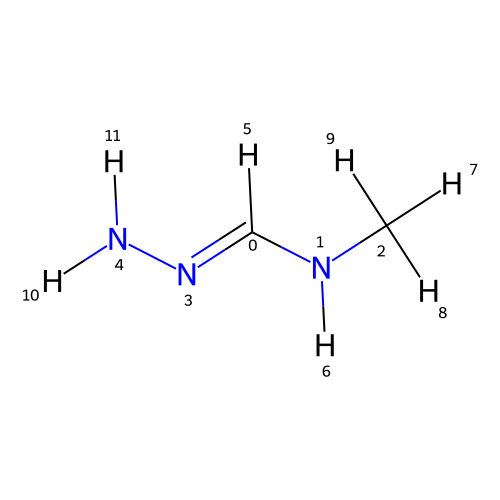

In [23]:
Chem.AddHs(Chem.MolFromSmiles(Chem.MolToSmiles(molobj, canonical=False)))

In [17]:
""" Sort block according to CIP rules and input properties if CIP is unambiguous
    
    Sorting according to the CIP rules works as follows:
    1) Take all bound substituents and sort according to atomic number in descending order.
    2) If (1) is not unique, for each atom with same priority (A*):
        a) Go to bound and yet not included atoms and sum up atomic numbers. Set priority of A* according to summed atomic numbers.
        b) If (2a) did not give unambiguous result expand shell of each atom A* by one bond.
        c) repeat (2b) until unique order is found.
    3) If no unique order is found in (2) and all bound atoms are included, then
       sort atoms according to the input properties in descending order (this is an arbitrary choice).
"""
print(end='')

1) Compare the atomic number (Z) of the atoms directly attached to the stereocenter; the group having the atom of higher atomic number Z receives higher priority (i.e. number 1).

2) If there is a tie, the atoms at distance 2 from the stereocenter have to be considered: a list is made for each group of further atoms bonded to the one directly attached to the stereocenter. Each list is arranged in order of decreasing atomic number Z. Then the lists are compared atom by atom; at the earliest difference, the group containing the atom of higher atomic number Z receives higher priority.

3) If there is still a tie, each atom in each of the two lists is replaced with a sublist of the other atoms bonded to it (at distance 3 from the stereocenter), the sublists are arranged in decreasing order of atomic number Z, and the entire structure is again compared atom by atom. This process is repeated recursively, each time with atoms one bond farther from the stereocenter, until the tie is broken.

### Isotopes
If two groups differ only in isotopes, then the larger atomic mass is used to set the priority.[10]

### Double and triple bonds
If an atom, A, is double-bonded to another atom, then atom A should be treated as though it is "connected to the same atom twice".[11] An atom that is double-bonded has a higher priority than an atom that is single bonded.[11] When dealing with double bonded priority groups, one is allowed to visit the same atom twice as one creates an arc.[12]

When B is replaced with a list of attached atoms, A itself, but not its "phantom", is excluded in accordance with the general principle of not doubling back along a bond that has just been followed. A triple bond is handled the same way except that A and B are each connected to two phantom atoms of the other.[2]

### Geometrical isomers
If two substituents on an atom are geometric isomers of each other, the Z-isomer has higher priority than the E-isomer. A stereoisomer that contains two higher priority groups on the same face of the double bond (cis) is classified as "Z." The stereoisomer with two higher priority groups on opposite sides of a carbon-carbon double bond (trans) is classified as "E."[13]

### Cyclic molecules
To handle a molecule containing one or more cycles, one must first expand it into a tree (called a hierarchical digraph) by traversing bonds in all possible paths starting at the stereocenter. When the traversal encounters an atom through which the current path has already passed, a phantom atom is generated in order to keep the tree finite. A single atom of the original molecule may appear in many places (some as phantoms, some not) in the tree.[14]

In [56]:
%time
### SORTING TESTS ###

# Example for CIP sorting a molecule, where step2 should end ealier for some atoms
# [6 6 6] --> [18 18 18] --> [32 32 34] (stop for atom3, due to higher priority else --> [67 67 34]).
# Moreover, atom property comparison is indeed for atom1 and atom2.
smi = 'C(c1cc(Br)c1)(c1cc(Br)c1)c1cnc1'
molobj = Chem.AddHs(Chem.MolFromSmiles(smi))
property_list = [-0.06121, 0.0121, -0.11463, 0.06838, -0.04068, -0.12524, 0.00966, -0.11705, 0.06807, -0.04101, -0.128, -0.03875, 0.10757, -0.50379, 0.22998, 0.10719, 0.09273, 0.0936, 0.09266, 0.0926, 0.09951, 0.09633]
contained_atoms = [0]
block = [1,6,11]

# # Example for CIP sorting a molecule, where step2 should end ealier for some atoms
# # [6 6 6 1] --> [18 18 18 1] --> [32 32 34 1] (stop for atom3, due to higher priority else --> [41 67 34 1]).
# # Moreover, atom property comparison is indeed for atom1 and atom2.
# smi = 'C(c1cc(F)c1)(c1cc(Br)c1)c1cnc1'
# molobj = Chem.AddHs(Chem.MolFromSmiles(smi))
# property_list = [-0.06003, 0.03027, -0.14135, 0.28993, -0.24696, -0.17102, 0.00915, -0.11414, 0.06884, -0.03825, -0.12766, -0.03945, 0.11013, -0.50171, 0.23061, 0.10937, 0.10239, 0.10343, 0.09394, 0.09401, 0.10104, 0.09747]
# contained_atoms = [0]
# block = [1,6,11,15]

# # Example for CIP sorting a molecule
# smi = 'C(SC)(SN)(OC)ON'
# molobj = Chem.AddHs(Chem.MolFromSmiles(smi))
# property_list = [0.53776, -0.15146, -0.14013, 0.00463, -0.80451, -0.53698, 0.05721, -0.44213, -0.61479, 0.0856, 0.09257, 0.0879, 0.38649, 0.38702, 0.08815, 0.08918, 0.07929, 0.39737, 0.39682]
# contained_atoms = [0]
# block = [1,3,5,7]

# Example for CIP sorting a molecule
smi = 'C(NC)N=N'
molobj = Chem.AddHs(Chem.MolFromSmiles(smi))
property_list = [0.20409, -0.75281, -0.03061, -0.2436, -0.40684, 0.09264, 0.10898, 0.39752, 0.08205, 0.08124, 0.08172, 0.38562]
contained_atoms = [0]
block = [1,3,5,6]

# # Example for CIP sorting a molecule
# smi = 'C(NC)=NN'
# molobj = Chem.AddHs(Chem.MolFromSmiles(smi))
# property_list = [0.35155, -0.71974, -0.01852, -0.4195, -0.69884, 0.08131, 0.40033, 0.08188, 0.08909, 0.10093, 0.37694, 0.37457]
# contained_atoms = [0]
# block = [1,3,5]

# # Example for CIP sorting a molecule
# smi = 'C(S[H])(SN)(OF)ON'
# molobj = Chem.AddHs(Chem.MolFromSmiles(smi))
# property_list = [0.56293, -0.23013, 0.03261, -0.81934, -0.29504, -0.04369, -0.40699, -0.60605, 0.21618, 0.39175, 0.39628, 0.4053, 0.39619]
# contained_atoms = [0]
# block = [1,2,4,6]

# # Example for CIP sorting a molecule
# smi = 'c1ccccc1N'
# molobj = Chem.AddHs(Chem.MolFromSmiles(smi))
# property_list = [-0.12512, -0.07987, -0.1069, -0.07987, -0.12512, 0.19794, -0.888, 0.08544, 0.08124, 0.08046, 0.08124, 0.08544, 0.39656, 0.39656]
# contained_atoms = [1]
# block = [0,2,8]

# # Example for CIP sorting a molecule
# smi = 'C(N)(F)C'
# molobj = Chem.AddHs(Chem.MolFromSmiles(smi))
# property_list = [0.35303, -0.93861, -0.32947, -0.24712, 0.09229, 0.39057, 0.3926, 0.09447, 0.09393, 0.09832]
# contained_atoms = [0]
# block = [1,2,3,4]

# # Example for CIP sorting a molecule
# smi = 'C(CN)(CF)(CC)C'
# molobj = Chem.AddHs(Chem.MolFromSmiles(smi))
# property_list = [-0.10044, 0.03242, -0.94693, 0.12304, -0.3224, -0.15093, -0.23629, 0.09465, 0.0794, 0.08427, 0.37769, 0.37699, 0.08924, 0.08323, 0.08181, 0.0956, 0.08015, 0.07625, 0.08227]
# contained_atoms = [0]
# block = [1,3,5,7]

# # Example for CIP sorting a molecule
# smi = 'Brc1c(NC2CC2)nc(C2CC2)nc1N1CCCCCC1'
# molobj = Chem.AddHs(Chem.MolFromSmiles(smi))
# property_list = [-0.04425, -0.00595, 0.42048, -0.701, 0.1056, -0.17439, -0.16669, -0.5741, 0.45475, -0.08115, -0.15783, -0.15815, -0.56637, 0.4218, -0.58069, 0.04631, -0.15711, -0.15631, -0.15464, -0.15826, 0.04827, 0.41559, 0.09337, 0.0945, 0.08828, 0.09727, 0.08793, 0.10208, 0.08491, 0.09153, 0.08478, 0.09062, 0.09039, 0.09015, 0.07847, 0.09057, 0.07568, 0.07815, 0.07841, 0.07796, 0.09002, 0.0783, 0.09065, 0.09004]
# contained_atoms = [7]
# block = [2,8]

# # Example that shows that you should only go to bound and yet not included atoms 
# # for atoms with same priority and not the entire shell.
# smi = 'Brc1c(NC2CC2)nc(C(Br)Br)nc1N1CCCCCC1'
# molobj = Chem.AddHs(Chem.MolFromSmiles(smi))
# property_list = [-0.04414, -0.01154, 0.42123, -0.68834, 0.11676, -0.17657, -0.17464, -0.55693, 0.4413, 0.04367, -0.05793, -0.05914, -0.56772, 0.42496, -0.57748, 0.04807, -0.15843, -0.15497, -0.15655, -0.1573, 0.04534, 0.40548, 0.10816, 0.09084, 0.09149, 0.09326, 0.0923, 0.09946, 0.09301, 0.09038, 0.09044, 0.07974, 0.07957, 0.07833, 0.07902, 0.07655, 0.09073, 0.07959, 0.0906, 0.0914]
# contained_atoms = [8]
# block = [7,9,12]

### END ###

cm5_list = gcs_generator.calc_CM5_charges(smi, name='testmol', optimize=False, save_output=True)
descriptor_vector, mapper_vector = gcs_generator.create_descriptor_vector(contained_atoms, n_shells=5, max_neighbors=4, use_cip_sort=True)
mapper_vector = mapper_vector[0]
descriptor_vector = np.array(descriptor_vector[0])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


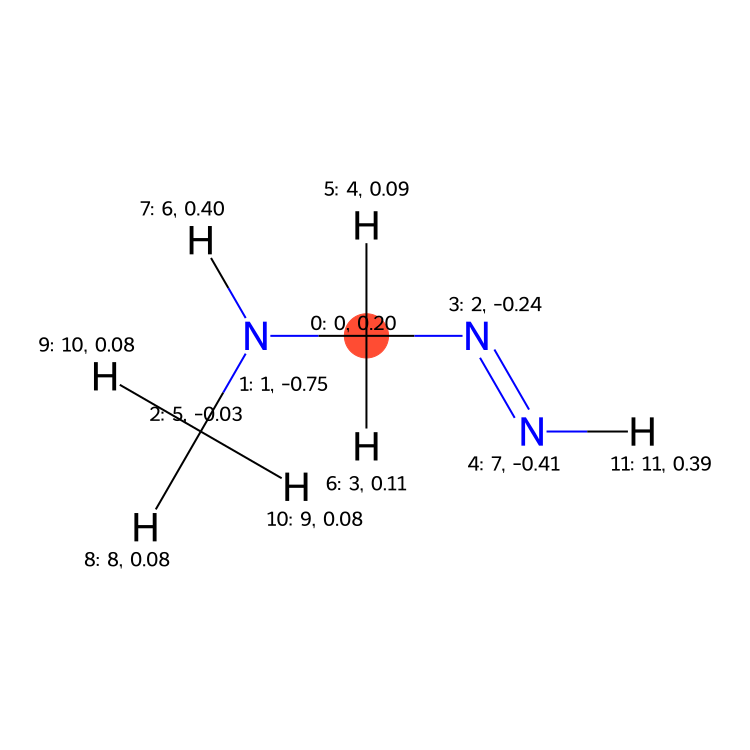

In [57]:
molobj = gcs_generator.rdkit_mol

priority_list = [x for x in mapper_vector if x != 'NaN']
priority_mapper = [priority_list.index(x) if x in priority_list else -1 for x in range(molobj.GetNumAtoms())]

for coef, cm5, atom in zip(priority_mapper, cm5_list, molobj.GetAtoms()):
    label = f"{atom.GetIdx()}: {coef:.0f}, {cm5:.2f}"
    atom.SetProp("atomNote", label)

AllChem.Compute2DCoords(molobj)

MolToImage(
    molobj,
    size=(750, 750),
    highlightAtoms=[contained_atoms[0]],
    highlightColor=(1,0.3,0.2)
)

In [58]:
smi = 'BrC(Br)c1nc(c2ccccc2)sc1'
molobj = Chem.AddHs(Chem.MolFromSmiles(smi))
contained_atoms = [13]

cm5_list = gcs_generator.calc_CM5_charges(smi, name='testmol', optimize=False, save_output=True)
descriptor_vector, mapper_vector = gcs_generator.create_descriptor_vector(contained_atoms, n_shells=5, max_neighbors=4, use_cip_sort=True)
mapper_vector = mapper_vector[0]
descriptor_vector = np.array(descriptor_vector[0])

print([f'{x:.2f}' for x in descriptor_vector[:1]])
print([f'{x:.2f}' for x in descriptor_vector[1:5]])
print([f'{x:.2f}' for x in descriptor_vector[5:17]])

['-0.04']
['-0.05', '0.17', '0.11', '0.00']
['0.30', '0.00', '0.00', '-0.54', '0.04', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']


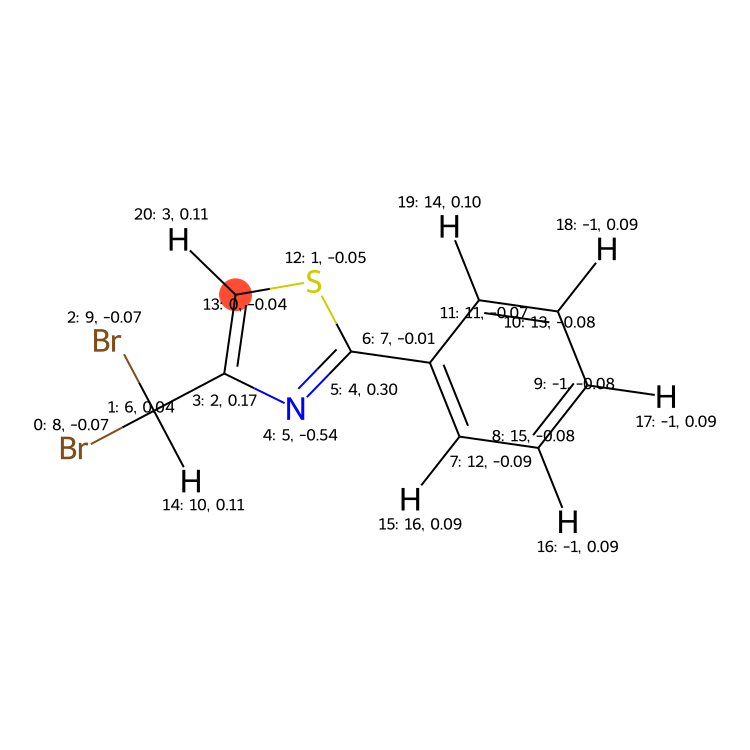

In [59]:
molobj = gcs_generator.rdkit_mol

priority_list = [x for x in mapper_vector if x != 'NaN']
priority_mapper = [priority_list.index(x) if x in priority_list else -1 for x in range(molobj.GetNumAtoms())]

for coef, cm5, atom in zip(priority_mapper, cm5_list, molobj.GetAtoms()):
    label = f"{atom.GetIdx()}: {coef:.0f}, {cm5:.2f}"
    atom.SetProp("atomNote", label)

AllChem.Compute2DCoords(molobj)

MolToImage(
    molobj,
    size=(750, 750),
    highlightAtoms=[contained_atoms[0]],
    highlightColor=(1,0.3,0.2)
)